##Importing necessary Libraries

In [114]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
import matplotlib.pyplot as plt

In [111]:
#Requesting Data from the URL

link = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm#'
res = requests.get(link)
soup = BeautifulSoup(res.text , 'html.parser')

In [112]:
party_names = []
won_seats = []
total_seats = []
for table in soup.find_all('table', class_='table'):
    rows = table.find_all('tr', class_='tr')
    for row in rows:
        name = row.find('td', style='text-align:left')
        won = row.find('td', style = 'text-align:right').find('a').text
        total = row.find('td', style = 'text-align:right').text
        party_names.append(name.text.split('-')[0][:-1])
        won_seats.append(won)
        total_seats.append(total[1:-1])


In [85]:
len(party_names)

42

In [86]:
len(won_seats)

42

In [87]:
len(total_seats)

42

In [88]:
d = {
    'Party_Name' : party_names,
    'Won': won_seats,
    'Total': total_seats
}

In [89]:
df = pd.DataFrame(d)

# Party Wise Result Status after the elections are completed

In [90]:
df

,Party_Name,Won,Total
0,Bharatiya Janata Party,240,240
1,Indian National Congress,99,99
2,Samajwadi Party,37,37
3,All India Trinamool Congress,29,29
4,Dravida Munnetra Kazhagam,22,22
5,Telugu Desam,16,16
6,Janata Dal (United),12,12
7,Shiv Sena (Uddhav Balasaheb Thackrey),9,9
8,Nationalist Congress Party – Sharadchandra Pawar,8,8
9,Shiv Sena,7,7


###To Create a CSV file from the Scraped data which can be used for other platforms or tools for creating insights or dashboards:

In [113]:
df.to_csv('loksabha_results.csv', index=False)

In [91]:
# to Read the CSV file
df = pd.read_csv('/content/loksabha_results.csv')
# to convert the data inside the columns into numerical data
df['Won'] = pd.to_numeric(df['Won'])
df['Total'] = pd.to_numeric(df['Total'])

#Insight 1 : Overall Seat Distribution
##The distribution of seats won by each party.
####Visualization: A bar chart showing the number of seats won by each party.

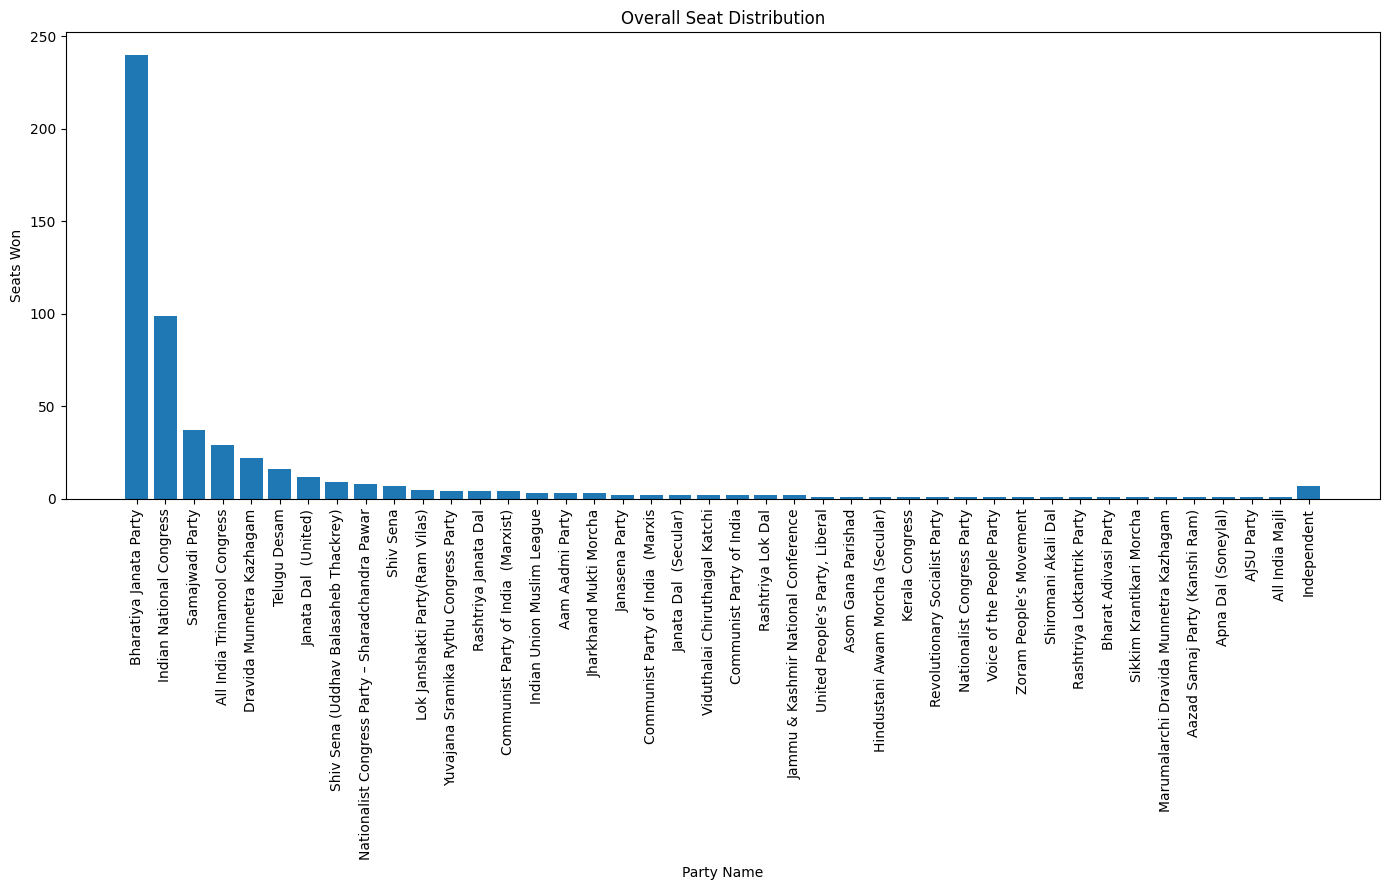

In [92]:
df['Win_Percentage'] = (df['Won'] / df['Total']) * 100

plt.figure(figsize=(14,9))
plt.bar(df['Party_Name'], df['Won'])
plt.xticks(rotation=90)
plt.xlabel('Party Name')
plt.ylabel('Seats Won')
plt.title('Overall Seat Distribution')
plt.tight_layout()
plt.show()

#Insight 2 : Top Winning Parties

##The parties with the highest number of seats won.
####Visualization: A sorted bar chart or a horizontal bar chart of the top 5 parties by seats won.

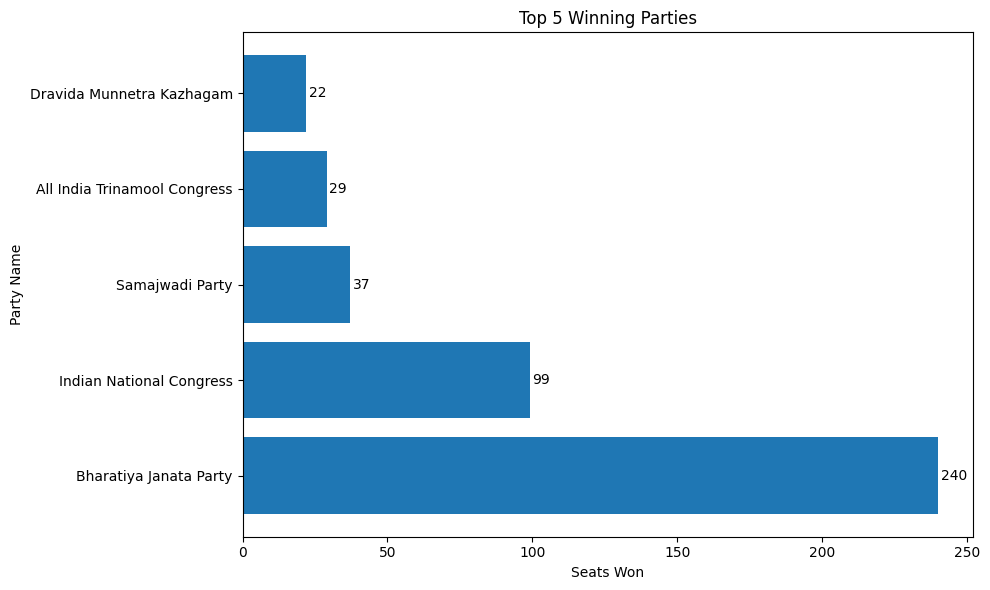

In [93]:
top_5_parties = df.nlargest(5, 'Won')

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_parties['Party_Name'], top_5_parties['Won'])
plt.xlabel('Seats Won')
plt.ylabel('Party Name')
plt.title('Top 5 Winning Parties')
plt.tight_layout()

for bar in bars:
    plt.text(
        bar.get_width() + 1,
        bar.get_y() + bar.get_height() / 2,
        int(bar.get_width()),
        ha='left',
        va='center'
    )

plt.show()

#Insight 3 : Winning Percentage by Party
##The percentage of contested seats won by each party.
####Visualization: A pie chart showing the winning percentage of each party.

In [99]:
pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 26.8 MB/s eta 0:00:00
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20727 sha256=320bbfa38593b2841ac03a4a6ea63ccf59186b4964575b04f28d3cef8b9f59d8
  Stored in directory: /root/.cache/pip/wheels/83/43/92/44f9515471f56877c774a515a2902d3e5484ea1bc7fd412d03
Successfully built mplcursors
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


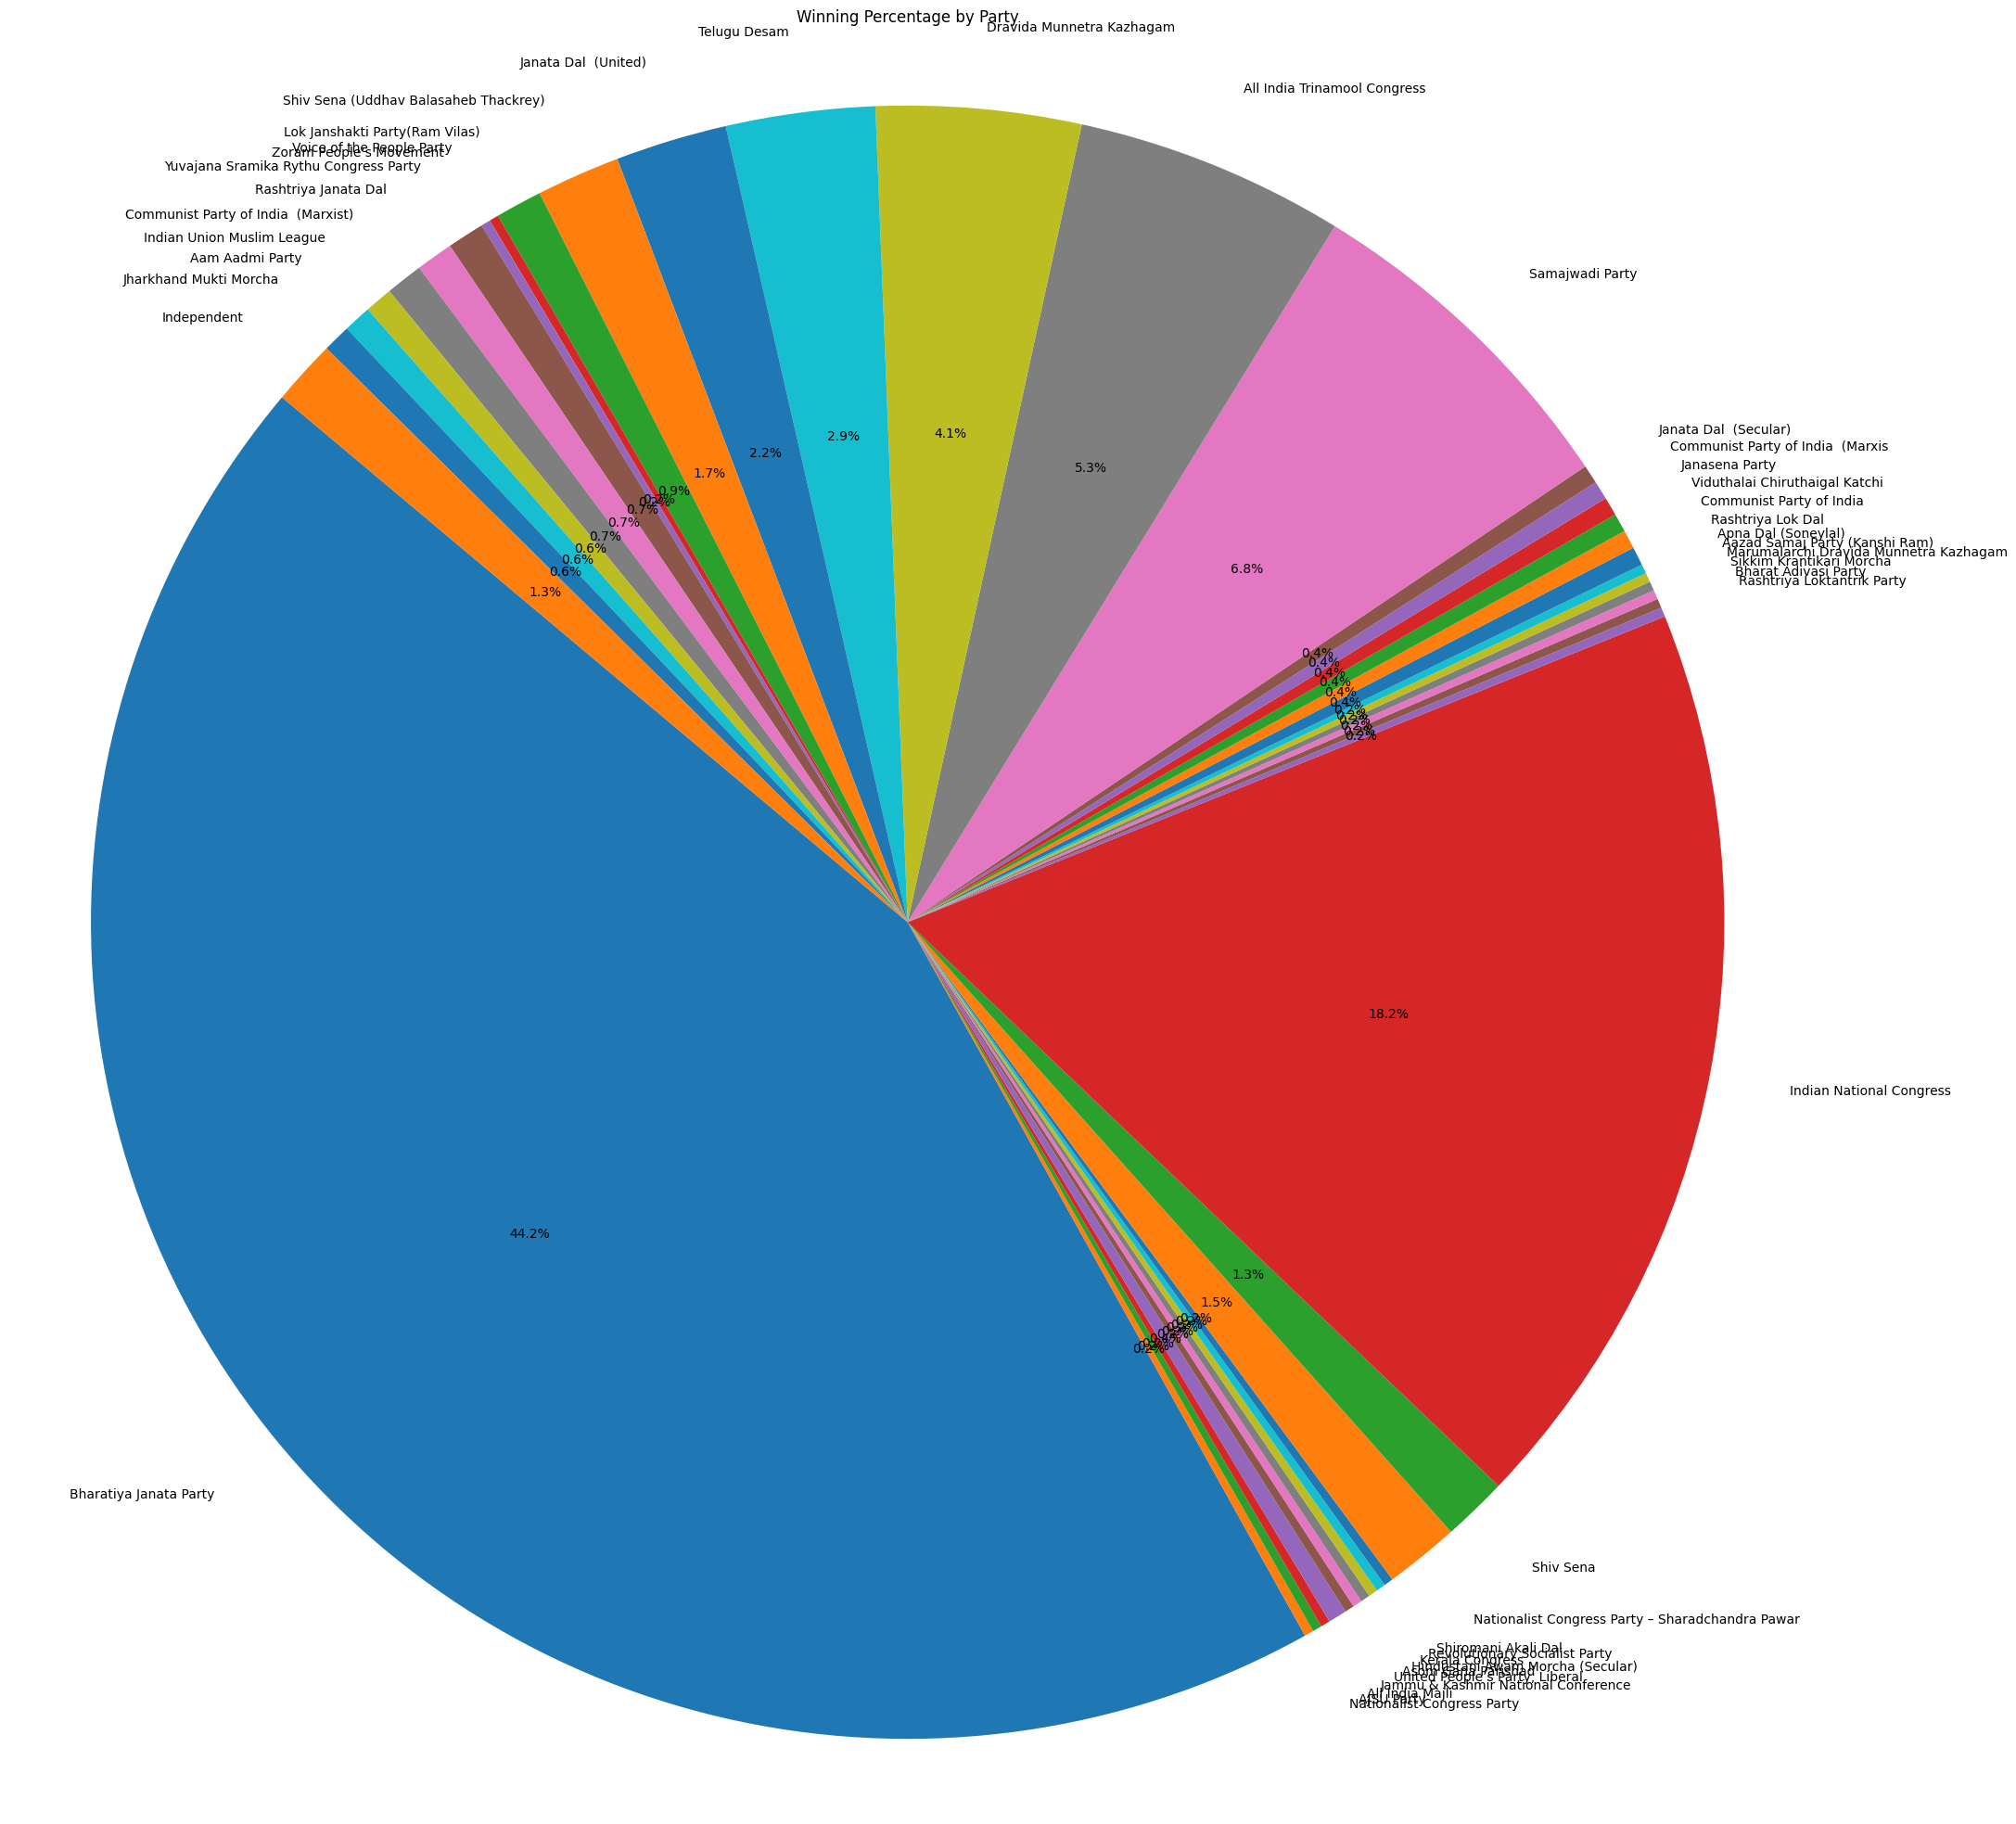

In [103]:
df['Winning_Percentage'] = (data['Won'] / data['Total']) * 100
df = df.sort_values(by='Winning_Percentage', ascending=False)

plt.figure(figsize=(25,25))
plt.pie(df['Won'], labels=df['Party_Name'], autopct='%1.1f%%', startangle=140)
plt.title('Winning Percentage by Party')
plt.axis('equal')
plt.show()

#Insight 4 : Comparison of Major Parties
##A direct comparison between the major parties Bharatiya Janata Party and Indian National Congress.

####Visualization: A grouped bar chart comparing the seats won by respective parties.

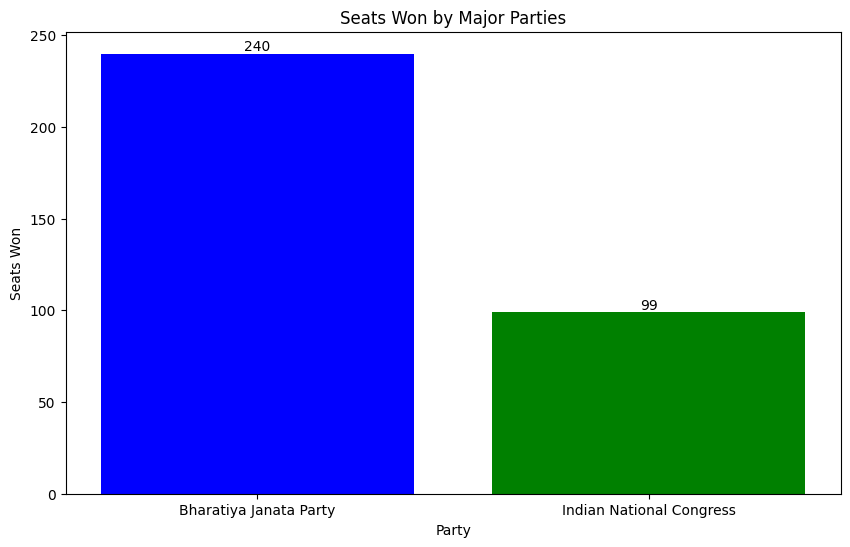

In [104]:
major_parties = ['Bharatiya Janata Party', 'Indian National Congress']
df_major_parties = df[df['Party_Name'].isin(major_parties)]

plt.figure(figsize=(10, 6))
bars = plt.bar(df_major_parties['Party_Name'], df_major_parties['Won'], color=['blue', 'green'])
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.title('Seats Won by Major Parties')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

#Insight 5 : Seat Win Ratio
##The ratio of seats won to seats contested for each party.
####Visualization: A line chart showing the win ratio for each party.

* This insight can be generated if the scraped data had the number of seats contested as the data doesn't have the requied contested data we consider won/total as ratio here

* Therefore the line chart is showing seat win ratio 1 for each party

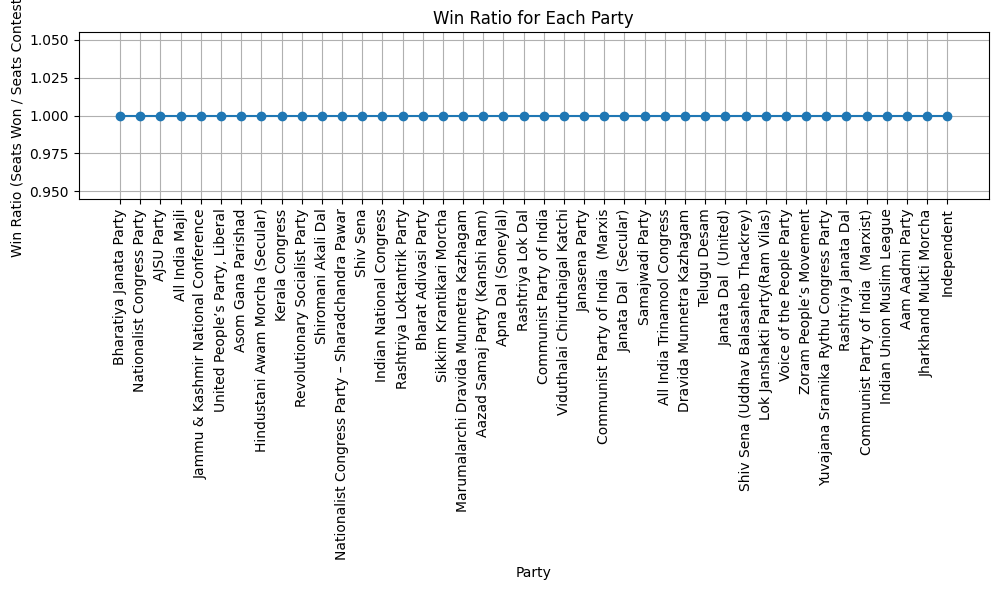

In [110]:
df['Win_Ratio'] = df['Won'] / df['Total']
plt.figure(figsize=(10, 6))
plt.plot(df['Party_Name'], df['Win_Ratio'], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel('Party')
plt.ylabel('Win Ratio (Seats Won / Seats Contested)')
plt.title('Win Ratio for Each Party')
plt.grid(True)
plt.tight_layout()
plt.show()

#Insight 6 : Regional Party Performance
##Performance of regional parties in the elections.
####Visualization: A bar chart highlighting the seats won by regional parties.

* Regional Parties are selected manually

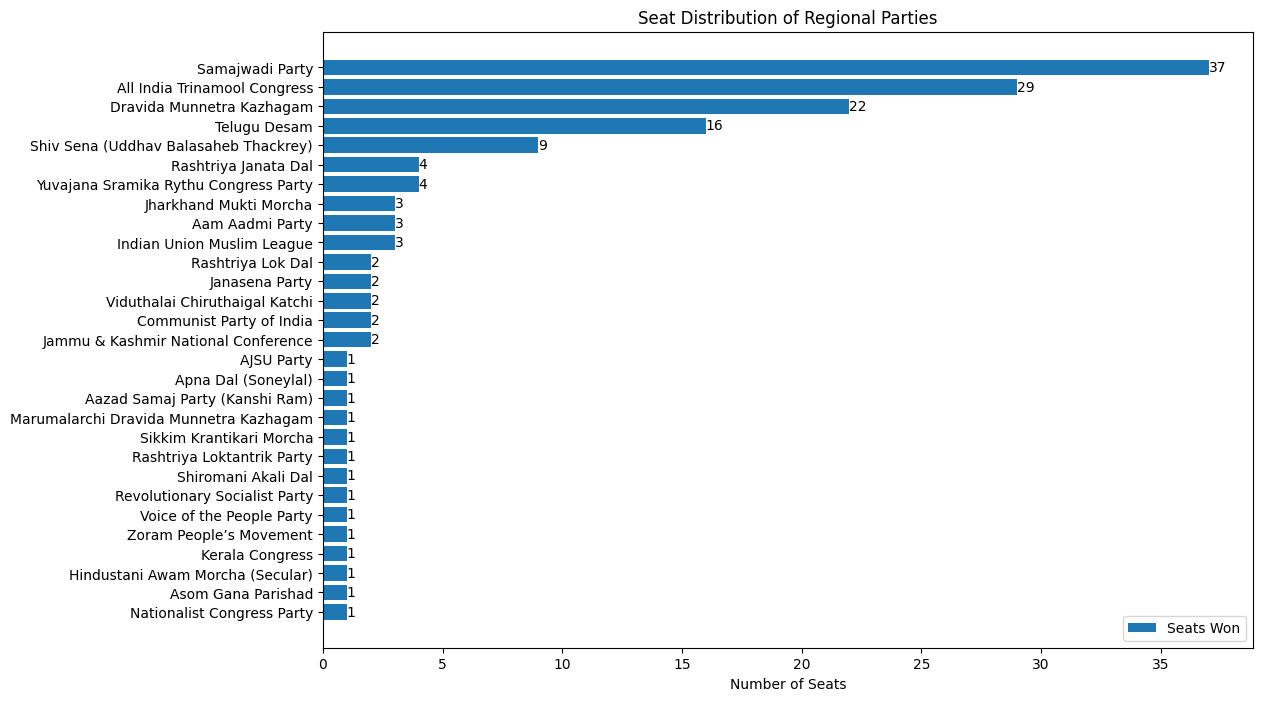

In [109]:
regional_parties = [
    'Samajwadi Party', 'All India Trinamool Congress', 'Dravida Munnetra Kazhagam',
    'Telugu Desam', 'Janata Dal (United)', 'Shiv Sena (Uddhav Balasaheb Thackrey)',
    'Nationalist Congress Party', 'Yuvajana Sramika Rythu Congress Party',
    'Rashtriya Janata Dal', 'Communist Party of India (Marxist)',
    'Indian Union Muslim League', 'Aam Aadmi Party', 'Jharkhand Mukti Morcha',
    'Janasena Party', 'Janata Dal (Secular)', 'Viduthalai Chiruthaigal Katchi',
    'Communist Party of India', 'Rashtriya Lok Dal', 'Jammu & Kashmir National Conference',
    'Asom Gana Parishad', 'Hindustani Awam Morcha (Secular)', 'Kerala Congress',
    'Revolutionary Socialist Party', 'Voice of the People Party', 'Zoram People’s Movement',
    'Shiromani Akali Dal', 'Rashtriya Loktantrik Party', 'Sikkim Krantikari Morcha',
    'Marumalarchi Dravida Munnetra Kazhagam', 'Aazad Samaj Party (Kanshi Ram)',
    'Apna Dal (Soneylal)', 'AJSU Party'
]

regional_data = df[df['Party_Name'].isin(regional_parties)]
regional_data = regional_data.sort_values(by='Won', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(regional_data['Party_Name'], regional_data['Won'], label='Seats Won')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Number of Seats')
plt.title('Seat Distribution of Regional Parties')
plt.legend()
plt.gca().invert_yaxis()

plt.show()

#Insight 7 :  Seats Contested vs. Won
##The difference between seats contested and seats won by each party.
####Visualization: A stacked bar chart can be used to show contested vs won seats by each party if the data was available.


#Insight 8 : Success Rate of Parties
##The success rate (win rate) of each party.
####Visualization: A heatmap or a color-coded bar chart can be used to depict the success rate of each party.


#Insight 9 : Minor Parties Overview
##Performance overview of minor parties in the election.
####Visualization: A pie chart can be used to show the combined seats won by minor parties or indipendents which are restricted to certain region.


#Insight 10 : Historical Comparison
##Comparison of current election results with previous election results.
####Visualization: A line chart can be used to show trends over multiple election cycles (requires additional data).
* As we do not have required data the comparison cannot be done